# [8] 부스팅 -Boosting
`-` 의사결정나무의 최종 진화형
 - table data 분석하는 가장 좋은 아이디어
 - ex) LightGBM , XGBoost , CatBoost
 - tabular 대회에서도 가장 우승많이한 아이디어

# `-` 주요 키워드
- 랜덤포레스트 : 다양성
- 부스팅 : 성장

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.tree
import sklearn.ensemble
#---#
import warnings
warnings.filterwarnings('ignore')
#---#
import matplotlib.animation
import IPython

In [5]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:80]
temp.sort()
eps = np.random.randn(80)*3 # 오차
icecream_sales = 20 + temp * 2.5 + eps 
df_train = pd.DataFrame({'temp':temp,'sales':icecream_sales})
df_train

,temp,sales
0,-4.1,10.900261
1,-3.7,14.002524
2,-3.0,15.928335
3,-1.3,17.673681
4,-0.5,19.463362
...,...,...
75,9.7,50.813741
76,10.3,42.304739
77,10.6,45.662019
78,12.1,48.739157


### `-` [적합]

In [7]:
# step1 
X = df_train[['temp']]
y = df_train['sales']
# step2 
predictr = sklearn.ensemble.GradientBoostingRegressor()
# step3 
predictr.fit(X,y)
# step4 
yhat = predictr.predict(X) 

In [8]:
trees = [t[0] for t in predictr.estimators_]
trees[0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x7FE1D03DD940)

In [16]:
# _yhat 으로 직접 boosting 만들어보기

In [9]:
_yhat = np.stack([tree.predict(X) for tree in trees]).mean(axis=0)
_yhat

array([-1.98529568, -1.68873716, -1.50105449, -1.32748757, -1.17877814,
       -1.12461928, -1.48130074, -1.47726246, -1.47726246, -1.14576839,
       -1.14576839, -0.93324255, -0.93324255, -0.82550938, -1.14740524,
       -0.63621774, -0.63621774, -0.99552612, -0.99552612, -0.56894418,
       -0.56894418, -0.56894418, -0.05104935, -0.39699577, -0.39699577,
       -0.39699577, -0.38296042, -0.38296042, -0.16511506, -0.13001062,
       -0.18975132, -0.18975132, -0.09772732, -0.09772732, -0.02478889,
       -0.02478889, -0.25650094, -0.02421372, -0.02421372, -0.03653755,
       -0.08676362, -0.08676362, -0.08676362, -0.05359582, -0.05359582,
        0.43424239,  0.43353213,  0.19572773,  0.19572773,  0.54183429,
        0.54183429,  0.2947621 ,  0.2947621 ,  0.2947621 ,  0.21585817,
        0.21585817,  0.7964528 ,  0.59531418,  0.49763334,  0.49763334,
        0.78455561,  0.78455561,  0.55907873,  0.48574479,  1.16729012,
        0.89795288,  0.92295305,  1.11059435,  1.09672204,  0.98

In [17]:
# 뭔가 많이 다른데 뭔지 모르겠다.

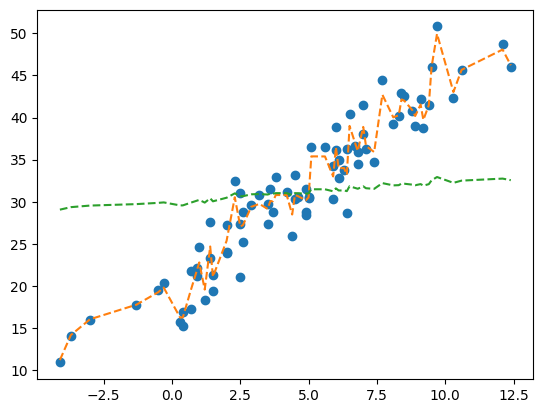

In [18]:
plt.plot(X,y,'o')
plt.plot(X,yhat,'--')
plt.plot(X,_yhat+y.mean(),'--')

[Text(0.5, 0.8333333333333334, 'x[0] <= 5.05\nfriedman_mse = 80.586\nsamples = 80\nvalue = 0.0'),
 Text(0.25, 0.5, 'x[0] <= 1.75\nfriedman_mse = 34.94\nsamples = 45\nvalue = -6.252'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'x[0] <= 7.55\nfriedman_mse = 24.396\nsamples = 35\nvalue = 8.039'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

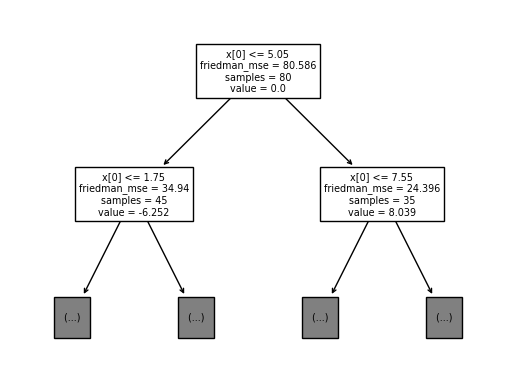

In [21]:
sklearn.tree.plot_tree(
    trees[0],
    max_depth=1
)
# tree 그림보면 평균을 더하면 좋을것같다.

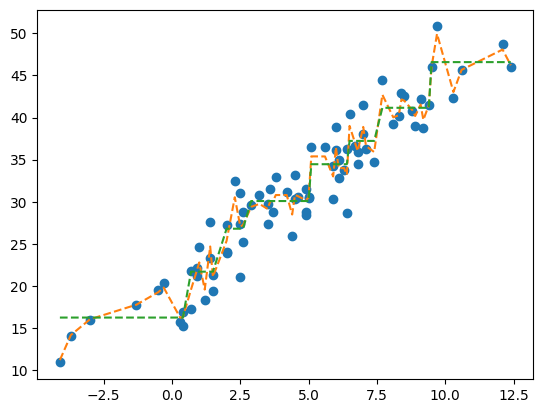

In [28]:
plt.plot(X,y,'o')
plt.plot(X,yhat,'--')
plt.plot(X,trees[0].predict(X)+y.mean(),'--')
# 뭔가 그럴사하다.

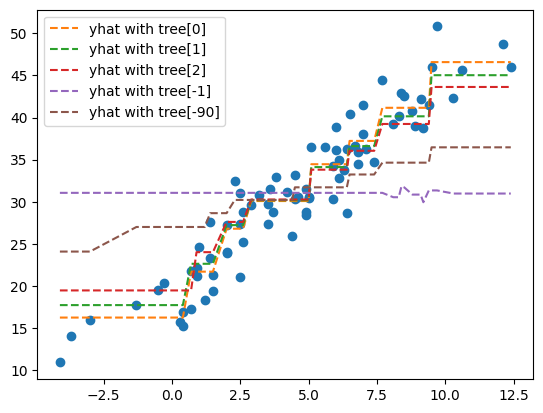

In [32]:
plt.plot(X,y,'o')
# plt.plot(X,yhat,'--')
plt.plot(X,trees[0].predict(X)+y.mean(),'--',label='yhat with tree[0]')
plt.plot(X,trees[1].predict(X)+y.mean(),'--',label='yhat with tree[1]')
plt.plot(X,trees[2].predict(X)+y.mean(),'--',label='yhat with tree[2]')
plt.plot(X,trees[-1].predict(X)+y.mean(),'--',label='yhat with tree[-1]')
plt.plot(X,trees[-90].predict(X)+y.mean(),'--',label='yhat with tree[-90]')

plt.legend()
#점점 적합이 잘되다가 마지막에는 평균에 거의 수렴한다.
# 이걸 어떻게 적합해야 좋은가?

`-` 정답 : 초기값: yhat = y.mean()으로 적합 – ver 0.0
<br>
첫번째 나무를 반영하는 방법: 현재까지의 적합값 + 첫번째 나무의 적합값 * 0.1 – ver 0.01
<br>
두번째 나무를 반영하는 방법: 현재까지의 적합값 + 두번째 나무의 적합값 * 0.1 – ver 0.02
…
<br>
100번째 나무를 반영하는 방법: 현재까지의 적합값 + 100번째 나무의 적합값 * 0.1 – ver 1.00

In [35]:
# 그러니까 점점 평균에 수렴한다.

In [39]:
predictions = [tree.predict(X) for tree in trees]
np.stack(predictions[:1]).sum(axis=0)

array([-14.8045146 , -14.8045146 , -14.8045146 , -14.8045146 ,
       -14.8045146 , -14.8045146 , -14.8045146 , -14.8045146 ,
       -14.8045146 ,  -9.35128477,  -9.35128477,  -9.35128477,
        -9.35128477,  -9.35128477,  -9.35128477,  -9.35128477,
        -9.35128477,  -9.35128477,  -9.35128477,  -4.24953412,
        -4.24953412,  -4.24953412,  -4.24953412,  -4.24953412,
        -4.24953412,  -4.24953412,  -4.24953412,  -4.24953412,
        -0.96183162,  -0.96183162,  -0.96183162,  -0.96183162,
        -0.96183162,  -0.96183162,  -0.96183162,  -0.96183162,
        -0.96183162,  -0.96183162,  -0.96183162,  -0.96183162,
        -0.96183162,  -0.96183162,  -0.96183162,  -0.96183162,
        -0.96183162,   3.41128302,   3.41128302,   3.41128302,
         3.41128302,   3.41128302,   3.41128302,   3.41128302,
         3.41128302,   3.41128302,   3.41128302,   3.41128302,
         6.18008577,   6.18008577,   6.18008577,   6.18008577,
         6.18008577,   6.18008577,   6.18008577,   6.18

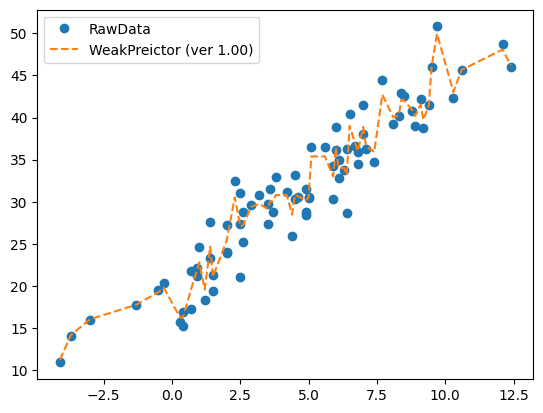

In [44]:
plt.plot(X,y,'o',label='RawData')
plt.plot(
    X,
    y.mean() + np.stack(predictions[:]).sum(axis=0)*0.1,
    '--',label='WeakPreictor (ver 1.00)'
)
plt.legend()

In [45]:
def ensemble(trees,i=None):
    if i is None:
        i = len(trees)
    else: 
        i = i+1
    yhat = np.stack([tree.predict(X) for tree in trees[:i]]).sum(axis=0)*0.1
    return yhat + y.mean()

In [46]:
fig = plt.figure()
ax = fig.subplots()
plt.close()
#---#
def func(i):
    ax.clear()
    ax.plot(X,y,'o',label='RawData')
    ax.plot(X,ensemble(trees,i),'--',label=f'WeakPredictor (ver {(i+1)/100:.2f})')
    ax.legend()
#---#    
ani = matplotlib.animation.FuncAnimation(
    fig,func,frames = 50
)
display(IPython.display.HTML(ani.to_jshtml()))